In [ ]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g')
Italia = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/RipGeo01012021_g')
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')


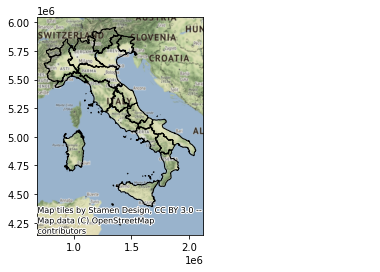

In [ ]:
ax = regioni.to_crs(epsg=3857).plot(edgecolor='black', facecolor='none')
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

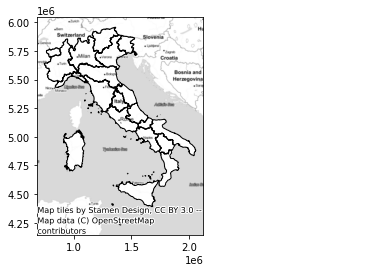

In [ ]:
ax = regioni.to_crs(epsg=3857).plot(edgecolor='black', facecolor='none')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

3. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
lombardia = regioni[regioni.DEN_REG == 'Lombardia']
lombardia

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."


In [ ]:
provincelombardia = province[province.within(lombardia.geometry.squeeze())]
provincelombardia

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
11,1,3,12,0,12,Varese,-,Varese,VA,Provincia,246016.658456,1.199334e+09,"POLYGON ((483071.566 5104606.092, 483258.471 5..."
12,1,3,13,0,13,Como,-,Como,CO,Provincia,260565.230534,1.279301e+09,"MULTIPOLYGON (((498077.207 5089780.202, 497614..."
13,1,3,14,0,14,Sondrio,-,Sondrio,SO,Provincia,464265.098278,3.194949e+09,"POLYGON ((595652.358 5163515.659, 596042.420 5..."
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."
15,1,3,16,0,16,Bergamo,-,Bergamo,BG,Provincia,310847.260446,2.754672e+09,"POLYGON ((585288.233 5104483.085, 585414.669 5..."
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446387.375203,4.787545e+09,"POLYGON ((615296.024 5132340.876, 615374.024 5..."
17,1,3,18,0,18,Pavia,-,Pavia,PV,Provincia,449504.645144,2.967086e+09,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
18,1,3,19,0,19,Cremona,-,Cremona,CR,Provincia,365500.445250,1.769382e+09,"POLYGON ((542189.537 5037362.585, 542408.347 5..."
19,1,3,20,0,20,Mantova,-,Mantova,MN,Provincia,386685.850910,2.341796e+09,"POLYGON ((630538.958 5031669.589, 632819.864 5..."
96,1,3,97,0,97,Lecco,-,Lecco,LC,Provincia,181294.401343,8.056511e+08,"POLYGON ((532079.618 5104664.092, 533286.608 5..."


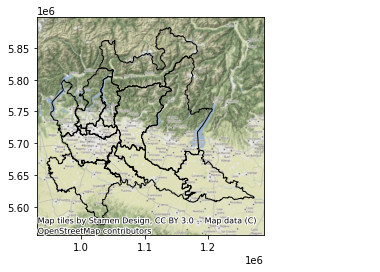

In [ ]:
ax = provincelombardia.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k')
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

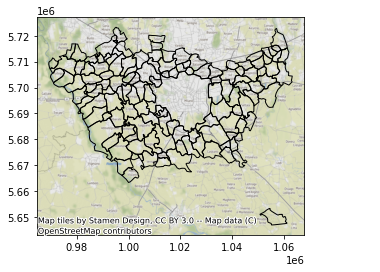

In [ ]:
milano = province[province.DEN_UTS == 'Milano']
comuni_mil = comuni[comuni.within(milano.geometry.squeeze())]

ax = comuni_mil.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k')
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

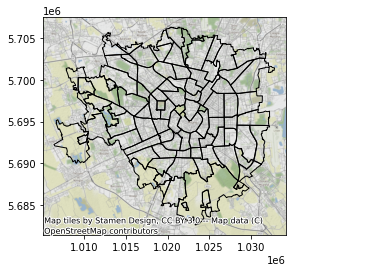

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k')
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

In [ ]:
provincia_lombardia = input('inserire una provincia della lombardia: ')
lst = list(provincielombardia['DEN_UTS'])
if provincia_lombardia not in list:
  print('La Provincia inserita non è in Lombardia')
else: 
  prov = provincielombardia[provincielombardia['DEN_UTS'] == utente].geometry.squeeze()
  prov2 = provincielombardia[provincielombardia['DEN_UTS'] == utente]
  ax = provincielombardia[provincielombardia.touches(prov)].to_crs(epsg=3857).plot(edgecolor='k', alpha=0.5, figsize=(15,10))
  prov2.to_crs(epsg=3857).plot(ax=ax, edgecolor='r', alpha=0.5)
  ctx.add_basemap(ax)